# Lab 3: Titanic

### Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew (32% survival rate). This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Overview

The data has been split into two groups:

training set (titanic_train.csv)
test set (titanic_test.csv)

The training set should be used to build your machine learning models. The training set includes the target (outcome) value for each passenger. Your model will be based on “features” like the passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. The test set lacks the target variable. It is the task of your model to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary

Survived: 0 = No, 1 = Yes

Pclass: class 1 = 1st, 2 = 2nd, 3 = 3rd 

Sex: gender

Age: Age in years 

SibSp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic 

Ticket: ticket number

Fare: Passenger fare 

Cabin: Cabin number 

Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


   **Variable Notes**
   
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

SibSp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore Parch=0 for them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Inspect the features
Note which are numerical and which are categorical.

### Distribution of numerical features
Check for outliers.

In [ ]:
df.describe()

### Check for missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Distribution of categorical features
Which features can be dropped?
Which features may we want to complete/impute?

In [ ]:
df.describe(include=["O"])

How may passengers survived?

What percentage of passengers traveled without a parent or child?

## Exploratory Data Analysis

In [15]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].hist(df.loc[df.Age.notnull(),'Age'],  alpha=.3, edgecolor='black', bins=[0,10,20,30,40,50,60,70,80,90])
ax[1].hist(df[['Parch', "SibSp"]],  alpha=.3, edgecolor='black', bins=[0,1,2,3,4,5,6])
plt.show()

Impute "Age"

### Feature Engineering
Perhaps create a new feature by creating Age or Fare bands (discretization).

In [48]:
#df['AgeBand'] = pd.cut(train_df['Age'], 5)
pd.cut(df['Age'], 5)

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
5                   NaN
6      (48.168, 64.084]
7        (0.34, 16.336]
8      (16.336, 32.252]
9        (0.34, 16.336]
10       (0.34, 16.336]
11     (48.168, 64.084]
12     (16.336, 32.252]
13     (32.252, 48.168]
14       (0.34, 16.336]
15     (48.168, 64.084]
16       (0.34, 16.336]
17                  NaN
18     (16.336, 32.252]
19                  NaN
20     (32.252, 48.168]
21     (32.252, 48.168]
22       (0.34, 16.336]
23     (16.336, 32.252]
24       (0.34, 16.336]
25     (32.252, 48.168]
26                  NaN
27     (16.336, 32.252]
28                  NaN
29                  NaN
             ...       
861    (16.336, 32.252]
862    (32.252, 48.168]
863                 NaN
864    (16.336, 32.252]
865    (32.252, 48.168]
866    (16.336, 32.252]
867    (16.336, 32.252]
868                 NaN
869      (0.34, 16.336]
870    (16.336, 32.252]
871    (32.252, 

In [ ]:
df.loc[ dataset['Age'] <= 16, 'Age'] = 0
df.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
df.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
df.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
df.loc[ dataset['Age'] > 64, 'Age']

### Analyze by grouping (pivoting) features

In [7]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Visualize feature relationships

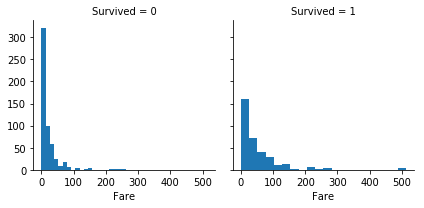

In [19]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)  # use age once imputed

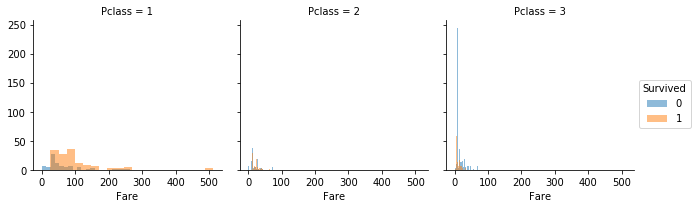

In [22]:
#grid = sns.FacetGrid(df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20)    # use age once imputed
grid.add_legend();

### Relating categorical features

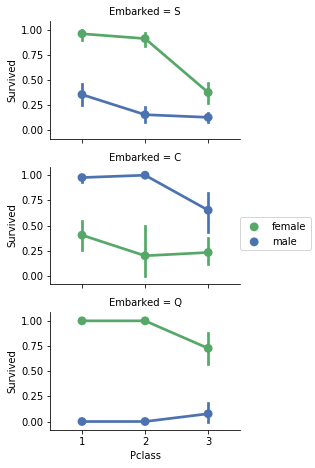

In [25]:
# grid = sns.FacetGrid(df, col='Embarked')
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Relating categorical and numerical features

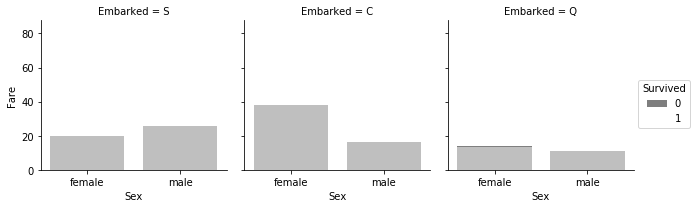

In [10]:
#grid = sns.FacetGrid(df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Drop poor features

In [ ]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

### Impute Age

Note: There is a correlation among Age, Gender, and Pclass. Perhaps impute Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

In [18]:
# Males in First Class
Age01_mean = df.loc[(df['Sex']=='male') & (df['Pclass']==1), 'Age'].mean()
Age01_std = df.loc[(df['Sex']=='male') & (df['Pclass']==1), 'Age'].std()
Age01_mean, Age01_std

(41.28138613861386, 15.139570471430355)

In [19]:
# Males in Second Class
Age01_mean = df.loc[(df['Sex']=='male') & (df['Pclass']==2), 'Age'].mean()
Age01_std = df.loc[(df['Sex']=='male') & (df['Pclass']==2), 'Age'].std()
Age01_mean, Age01_std

(30.74070707070707, 14.793893752224003)

In [39]:
# get the mean and std of Males in First Class
# generate an Age randomly within 1 standard deviation of the mean
Age01_impute = round(np.random.uniform(Age01_mean - Age01_std, Age01_mean + Age01_std))

24

In [ ]:
# replace the null values with the imputed age
df.loc[ (df["Age"].isnull()) & (dataset.Sex=='male') & (dataset.Pclass==1),'Age'] = Age01_impute